In [ ]:
import pandas as pd
import os

os.listdir('sample_data')
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))

[[0.25806452 0.45454545]
 [1.         1.        ]
 [0.         0.        ]
 [0.08064516 0.13636364]
 [0.16129032 0.27272727]]


array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [ ]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data

array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(x_test)

30

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import tree
iris = datasets.load_iris()
x = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_iris
iris = pd.read_csv('Iris.csv')
iris.head()
iris.drop('Id', axis=1, inplace=True)
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']
# membuat model decision tree
tree_model = DecisionTreeClassifier()
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded = True,
    filled = True
)

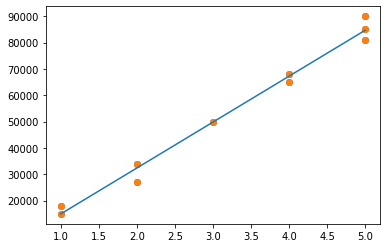

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
# data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])
# menampilkan scatter plot dari dataset
%matplotlib inline
plt.scatter(bedrooms, house_price)

from sklearn.linear_model import LinearRegression
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.info()
data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
X = data[predictions]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


0.63

<function matplotlib.pyplot.show>

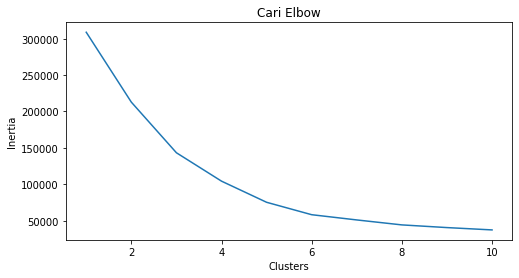

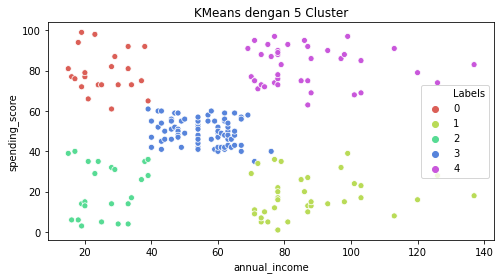

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
# tampilkan 3 baris pertama
df.head(3)
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di proses
df.head(3)

from sklearn.cluster import KMeans
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
# membuat list yang berisi inersia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)
# membuat plot inersia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
atribut = iris.data
label = iris.target
# bagi dataset menjadi train set dan  test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2)

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()
df.info()
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

from sklearn.preprocessing import StandardScaler
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0.7559055118110236

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


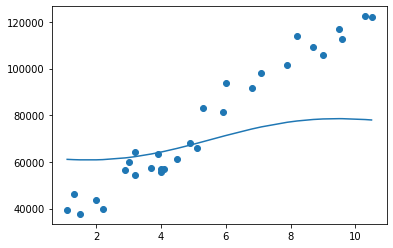

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Salary_Data.csv')
data.info()
data.head()

import numpy as np
X = data['YearsExperience']
y = data['Salary']
X = X[:, np.newaxis]

from sklearn.svm import SVR
model = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X, y)

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model.predict(X))

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


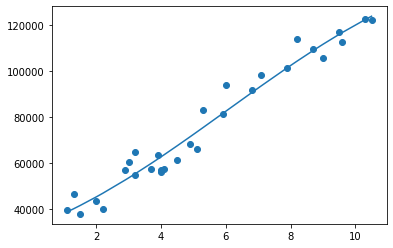

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Salary_Data.csv')

import numpy as np
X = data['YearsExperience']
y = data['Salary']
X = X[:, np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X, y)
print(grid_search.best_params_)

model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X, y)

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 # melakukan ekstraksi file zip
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
 -O /tmp/messy_vs_clean_room.zip

--2020-06-10 05:22:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  20.7MB/s    in 3.2s    

2020-06-10 05:22:38 (20.7 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')
test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                    train_dir, #direktori data latih
                    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150
                    batch_size=4, #merupakan masalah klasifikasi 2 kelas maka menggunakan 'binary'
                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                    validation_dir, #direktori data latih
                    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150
                    batch_size=4, #merupakan masalah klasifikasi 2 kelas maka menggunakan 'binary'
                    class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20,
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2)

Epoch 1/20
25/25 - 11s - loss: 0.9717 - accuracy: 0.5300 - val_loss: 0.6437 - val_accuracy: 0.6000
Epoch 2/20
25/25 - 11s - loss: 0.6600 - accuracy: 0.5900 - val_loss: 0.6294 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 11s - loss: 0.6774 - accuracy: 0.5200 - val_loss: 0.6525 - val_accuracy: 0.7500
Epoch 4/20
25/25 - 11s - loss: 0.6199 - accuracy: 0.6100 - val_loss: 0.5616 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 11s - loss: 0.5478 - accuracy: 0.7400 - val_loss: 0.5033 - val_accuracy: 0.7000
Epoch 6/20
25/25 - 11s - loss: 0.5359 - accuracy: 0.7400 - val_loss: 0.5599 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 11s - loss: 0.4745 - accuracy: 0.7900 - val_loss: 0.4440 - val_accuracy: 0.7000
Epoch 8/20
25/25 - 11s - loss: 0.4057 - accuracy: 0.8200 - val_loss: 0.3348 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 11s - loss: 0.6237 - accuracy: 0.7500 - val_loss: 0.4931 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 11s - loss: 0.5177 - accuracy: 0.7600 - val_loss: 0.7464 - val_accuracy: 0.5500
Epoch 11/

Saving gettyimages-1132392126-612x612.jpg to gettyimages-1132392126-612x612.jpg
gettyimages-1132392126-612x612.jpg
messy


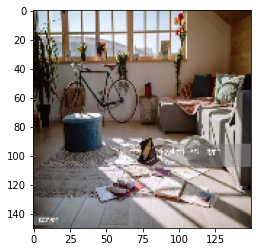

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')